# Лабораторная работа № 2
## Выполнил студент группы ИУ5-24М Лычагин Д.
### Датасет Время марафона

In [5]:
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MaxAbsScaler
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats

In [6]:
data = pd.read_csv('marathon-data.csv')
data.head()

,age,gender,split,final
0,33,M,01:05:38,02:08:51
1,32,M,01:06:26,02:09:28
2,31,M,01:06:49,02:10:42
3,38,M,01:06:16,02:13:45
4,31,M,01:06:32,02:13:59


## Добавление 2 полей в секундах

In [7]:
import datetime

def convert_time(s):
    h, m, s = map(int, s.split(':'))
    return datetime.timedelta(hours=h, minutes=m, seconds=s)

data = pd.read_csv(r'C:\Users\lycha\.jupyter\marathon-data.csv',
                   converters={'split':convert_time, 'final':convert_time})
data.head()

,age,gender,split,final
0,33,M,0 days 01:05:38,0 days 02:08:51
1,32,M,0 days 01:06:26,0 days 02:09:28
2,31,M,0 days 01:06:49,0 days 02:10:42
3,38,M,0 days 01:06:16,0 days 02:13:45
4,31,M,0 days 01:06:32,0 days 02:13:59


In [8]:
data['split_sec'] = data['split'].astype(np.int64) / 1E9
data['final_sec'] = data['final'].astype(np.int64) / 1E9
data.head()

,age,gender,split,final,split_sec,final_sec
0,33,M,0 days 01:05:38,0 days 02:08:51,3938.0,7731.0
1,32,M,0 days 01:06:26,0 days 02:09:28,3986.0,7768.0
2,31,M,0 days 01:06:49,0 days 02:10:42,4009.0,7842.0
3,38,M,0 days 01:06:16,0 days 02:13:45,3976.0,8025.0
4,31,M,0 days 01:06:32,0 days 02:13:59,3992.0,8039.0


In [9]:
data_lr3 = data[['gender','split_sec', 'final_sec', 'age']]

In [10]:
data_lr3.describe()

,split_sec,final_sec,age
count,37250.000000,37250.000000,37250.000000
mean,7434.425664,17289.303597,40.697369
std,1375.093890,3812.145345,10.220043
min,3921.000000,7731.000000,17.000000
25%,6505.000000,14544.000000,33.000000
50%,7273.000000,17065.000000,40.000000
75%,8171.000000,19656.000000,48.000000
max,17989.000000,36068.000000,86.000000


In [11]:
X_ALL = data_lr3.drop('gender', axis=1)

In [12]:
def arr_to_df(arr_scaled):
    res = pd.DataFrame(arr_scaled, columns=X_ALL.columns)
    return res

In [13]:
# Разделим выборку на обучающую и тестовую
X_train, X_test, y_train, y_test = train_test_split(X_ALL, data_lr3['gender'],
                                                    test_size=0.2,
                                                    random_state=1)
# Преобразуем массивы в DataFrame
X_train_df = arr_to_df(X_train)
X_test_df = arr_to_df(X_test)

X_train_df.shape, X_test_df.shape

((29800, 3), (7450, 3))

## Масштабирование признаков

### StandardScaler

In [14]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs11 = StandardScaler()
data_cs11_scaled_temp = cs11.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs11_scaled =  arr_to_df(data_cs11_scaled_temp)
data_cs11_scaled

,split_sec,final_sec,age
0,-2.542716,-2.507363,-0.753174
1,-2.507808,-2.497657,-0.851022
2,-2.491082,-2.478245,-0.948871
3,-2.515081,-2.430240,-0.263933
4,-2.503445,-2.426567,-0.948871
...,...,...,...
37245,6.130263,4.482496,-2.220898
37246,6.624054,4.490628,-0.459629
37247,6.050995,4.493776,1.008094
37248,7.600728,4.918739,1.399487


### Mean Normalisation

In [15]:
class MeanNormalisation:
    
    def fit(self, param_df):
        self.means = X_train.mean(axis=0)
        maxs = X_train.max(axis=0)
        mins = X_train.min(axis=0)
        self.ranges = maxs - mins

    def transform(self, param_df):
        param_df_scaled = (param_df - self.means) / self.ranges
        return param_df_scaled
    
    def fit_transform(self, param_df):
        self.fit(param_df)
        return self.transform(param_df)

In [16]:
sc21 = MeanNormalisation()
data_cs21_scaled = sc21.fit_transform(X_ALL)
data_cs21_scaled.describe()

,split_sec,final_sec,age
count,37250.000000,37250.000000,37250.000000
mean,-0.000164,-0.000290,0.000129
std,0.097746,0.134529,0.148117
min,-0.249910,-0.337598,-0.343311
25%,-0.066231,-0.097170,-0.111427
50%,-0.011639,-0.008205,-0.009978
75%,0.052194,0.083230,0.105964
max,0.750090,0.662402,0.656689


In [17]:
cs22 = MeanNormalisation()
cs22.fit(X_train)
data_cs22_scaled_train = cs22.transform(X_train)
data_cs22_scaled_test = cs22.transform(X_test)
data_cs22_scaled_train.describe()

,split_sec,final_sec,age
count,2.980000e+04,2.980000e+04,2.980000e+04
mean,6.380057e-19,-5.723144e-17,-4.363470e-17
std,9.759493e-02,1.343910e-01,1.481152e-01
min,-2.499099e-01,-3.375980e-01,-3.433114e-01
25%,-6.608843e-02,-9.674686e-02,-1.114274e-01
50%,-1.114103e-02,-7.605454e-03,-9.978115e-03
75%,5.242522e-02,8.372390e-02,1.059639e-01
max,7.500901e-01,6.624020e-01,6.566886e-01


### MinMax-масштабирование

In [18]:
# Обучаем StandardScaler на всей выборке и масштабируем
cs31 = MinMaxScaler()
data_cs31_scaled_temp = cs31.fit_transform(X_ALL)
# формируем DataFrame на основе массива
data_cs31_scaled = arr_to_df(data_cs31_scaled_temp)
data_cs31_scaled.describe()

,split_sec,final_sec,age
count,37250.000000,37250.000000,37250.000000
mean,0.249746,0.337308,0.343440
std,0.097746,0.134529,0.148117
min,0.000000,0.000000,0.000000
25%,0.183679,0.240428,0.231884
50%,0.238271,0.329393,0.333333
75%,0.302104,0.420828,0.449275
max,1.000000,1.000000,1.000000


In [19]:
cs32 = MinMaxScaler()
cs32.fit(X_train)
data_cs32_scaled_train_temp = cs32.transform(X_train)
data_cs32_scaled_test_temp = cs32.transform(X_test)
# формируем DataFrame на основе массива
data_cs32_scaled_train = arr_to_df(data_cs32_scaled_train_temp)
data_cs32_scaled_test = arr_to_df(data_cs32_scaled_test_temp)
data_cs32_scaled_train.describe()

,split_sec,final_sec,age
count,29800.000000,29800.000000,29800.000000
mean,0.249910,0.337598,0.343311
std,0.097595,0.134391,0.148115
min,0.000000,0.000000,0.000000
25%,0.183821,0.240851,0.231884
50%,0.238769,0.329993,0.333333
75%,0.302335,0.421322,0.449275
max,1.000000,1.000000,1.000000


## Обработка выбросов для числовых признаков

### Удаление выбросов

In [20]:
data_lr3_chng = data_lr3[(data_lr3['age'] < np.quantile(data_lr3['age'], 0.95)) & (data_lr3['age'] > np.quantile(data_lr3['age'], 0.05))]

In [21]:
data_lr3_chng.count()

gender       33358
split_sec    33358
final_sec    33358
age          33358
dtype: int64

### Замена выбросов

In [24]:
data_lr3_del = data_lr3
data_lr3_del['age'] = np.where(data_lr3_del['age'] > np.quantile(data_lr3_del['age'], 0.95), np.quantile(data_lr3_del['age'], 0.95), data_lr3_del['age'])
data_lr3_del['age'] = np.where(data_lr3_del['age'] < np.quantile(data_lr3_del['age'], 0.05), np.quantile(data_lr3_del['age'], 0.05), data_lr3_del['age'])

In [25]:
data_lr3_del.count()

gender       37250
split_sec    37250
final_sec    37250
age          37250
dtype: int64

## Обработка нестандартного признака

In [26]:
data.dtypes

age                    int64
gender                object
split        timedelta64[ns]
final        timedelta64[ns]
split_sec            float64
final_sec            float64
dtype: object

In [ ]:
data["split_sec_date"] = data.apply(lambda x: pd.to_datetime(x["split_sec"], format='%m/%d/%Y'), axis=1)

## Отбор признаков

### Метод фильтрации (Корреляция признаков)

<AxesSubplot:>

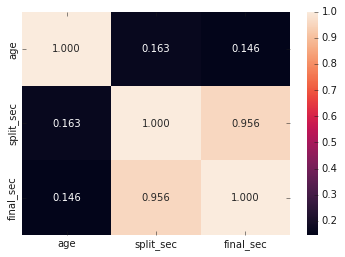

In [28]:
sns.heatmap(data.corr(), annot=True, fmt='.3f')

In [29]:
# Формирование DataFrame с сильными корреляциями
def make_corr_df(df):
    cr = data.corr()
    cr = cr.abs().unstack() 
    cr = cr.sort_values(ascending=False)
    cr = cr[cr >= 0.3]
    cr = cr[cr < 1]
    cr = pd.DataFrame(cr).reset_index()
    cr.columns = ['f1', 'f2', 'corr']
    return cr

In [30]:
# Обнаружение групп коррелирующих признаков
def corr_groups(cr):
    grouped_feature_list = []
    correlated_groups = []

    for feature in cr['f1'].unique():
        if feature not in grouped_feature_list:
            # находим коррелирующие признаки
            correlated_block = cr[cr['f1'] == feature]
            cur_dups = list(correlated_block['f2'].unique()) + [feature]
            grouped_feature_list = grouped_feature_list + cur_dups
            correlated_groups.append(cur_dups)
    return correlated_groups

In [31]:
# Группы коррелирующих признаков
corr_groups(make_corr_df(data))

[['final_sec', 'split_sec']]

## Метод из группы методов вложений

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

In [36]:
# Используем L1-регуляризацию
e_lr1 = LogisticRegression(C=1000, solver='liblinear', penalty='l1', max_iter=500, random_state=1)
e_lr1.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr1.coef_

array([[ 0.00102894, -0.00017771, -0.0522335 ]])

In [37]:
# Все признаки являются "хорошими"
from sklearn.feature_selection import SelectFromModel
sel_e_lr1 = SelectFromModel(e_lr1)
sel_e_lr1.fit(X_train, y_train)
sel_e_lr1.get_support()

array([ True,  True,  True])

In [39]:
e_lr2 = LinearSVC(C=0.01, penalty="l1", max_iter=2000, dual=False)
e_lr2.fit(X_train, y_train)
# Коэффициенты регрессии
e_lr2.coef_

array([[ 3.93283980e-04, -6.56364245e-05, -2.10899603e-02]])

In [41]:
# Признаки с флагом False д.б. исключены
sel_e_lr2 = SelectFromModel(e_lr2)
sel_e_lr2.fit(X_train, y_train)
sel_e_lr2.get_support()

array([ True,  True,  True])